In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import datasets, metrics, model_selection
from sklearn.calibration import calibration_curve, CalibrationDisplay

<h1>Link to data</h1>	
https://www.kaggle.com/gauravduttakiit/loan-defaulter?select=application_data.csv 

In [2]:
apps = pd.read_csv("application_data.csv")

In [3]:
#Clean columns 'OCCUPATION_TYPE','OWN_CAR_AGE', 'DAYS_BIRTH', and create column 'outcome'
nan_filled_cols = ['TARGET']
apps['OCCUPATION_TYPE'] = apps['OCCUPATION_TYPE'].fillna("Unemployed")
apps['OWN_CAR_AGE'] = apps['OWN_CAR_AGE'].fillna(200)
apps['DAYS_BIRTH'] = apps[['DAYS_BIRTH']].apply(lambda x: abs(x) // 365)
apps['outcome'] = apps['TARGET']
for col in apps.columns:
    tot = len(apps[col])
    nans_tot = apps[col].isna().sum()
    #Get percentage of each column that is NaN
    perc = nans_tot / tot 
    #Fill NaNs with 0 for time being
    if apps[col].dtypes == "O":
        apps[col] =  apps[col].fillna("")
    elif  apps[col].dtypes != "O":
        apps[col] =  apps[col].fillna(0)
    #If NaNs are more than 15% of column drop the column 
    if perc > 0.15:
        nan_filled_cols.append(col)
#drop all NaN columns and TARGET
apps = apps.drop(columns = nan_filled_cols)
 
#OrdinalEncode object columns 
for col in apps.columns:
    oe = OrdinalEncoder()
    if apps[col].dtypes == "O":
        apps[col] =  oe.fit_transform(apps[[col]].to_numpy().reshape(-1,1))
        apps[col] = apps[col].apply(lambda x: int(round(x)))


In [4]:
y = apps['outcome']
X = apps[['FLAG_OWN_CAR',
      'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


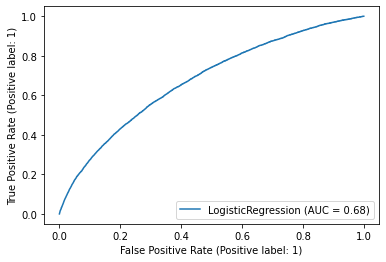

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
LR = LogisticRegression(random_state=0, penalty = "none", max_iter = 1000).fit(X_train, y_train)
importance = LR.coef_[0]
dd = dict(zip(importance, X.columns.to_list()))
sdd = sorted(dd.keys())[::-1]
sdd
metrics.plot_roc_curve(LR, X_test, y_test) 

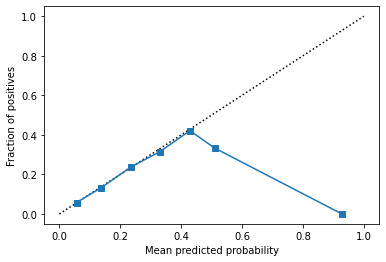

In [6]:
y_prob = LR.predict_proba(X_train)[:, 1]
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()